# plot dice Coeff


In [1]:
import csv
from autoresec import delineate_resection, delineate_resection_post
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np


In [2]:

def get_dice(seg1_path, seg2_path):
    # Read Nifti files
    seg1 = sitk.ReadImage(seg1_path)
    seg2 = sitk.ReadImage(seg2_path)

    # Convert images to NumPy arrays
    seg1_array = sitk.GetArrayFromImage(seg1)
    seg2_array = sitk.GetArrayFromImage(seg2)

    # Flatten arrays for Dice coefficient calculation
    seg1_flat = np.int16(seg1_array.flatten() >0)
    seg2_flat = np.int16(seg2_array.flatten()>0)

    # Calculate Dice coefficient
    dice_coefficient = 2 * (seg1_flat.dot(seg2_flat)) / ((seg1_flat.sum() + seg2_flat.sum()))

    print('Dice coefficient: ', dice_coefficient)
    return dice_coefficient



In [3]:

# Specify the file path
csv_file = '/deneb_disk/auto_resection/EPISURG/subjects.csv'  # Replace with your CSV file path

# Initialize an empty list to store subject IDs with preop MRI
subjects_with_mri = []

dice_manual1 = list()
dice_manual2 = list()
dice_manual3 = list()

# Open the CSV file for reading
with open(csv_file, mode='r') as file:
    csv_reader = csv.reader(file)

    # Iterate through the rows in the CSV file
    for row in csv_reader:
        # Check if the 4th column (index 3 in 0-based indexing) contains "1" (indicating preop MRI available)
        if (row[3] == 'True') and (row[4] == 'True' or row[5] == 'True' or row[6] == 'True'):

            print(f'{row[4]} {row[5]} {row[6]}')
            # Add the subject ID (1st column) to the list
            subjects_with_mri.append(row[0])

            preop_mri = '/deneb_disk/auto_resection/EPISURG/subjects/' + \
                row[0] + '/preop/' + row[0] + '_preop-t1mri-1.nii.gz'
            postop_mri = '/deneb_disk/auto_resection/EPISURG/subjects/' + \
                row[0] + '/postop/' + row[0] + '_postop-t1mri-1.nii.gz'
            
            resection_preop_file = '/deneb_disk/auto_resection/EPISURG/subjects/' + row[0] + '/preop/' + row[0] + '_preop-t1mri-1.resection.mask.nii.gz'
            resection_postop_file = '/deneb_disk/auto_resection/EPISURG/subjects/' + row[0] + '/postop/' + row[0] + '_postop-t1mri-1.resection.mask.nii.gz'

            if row[4] == 'True':
                manual1_resection_file = '/deneb_disk/auto_resection/EPISURG/subjects/' + row[0] + '/postop/' + row[0] + '_postop-seg-1.nii.gz'
                d = get_dice(manual1_resection_file,resection_postop_file)
                if d > 0.1:
                    dice_manual1.append(d)





            if row[5] == 'True':
                manual2_resection_file = '/deneb_disk/auto_resection/EPISURG/subjects/' + row[0] + '/postop/' + row[0] + '_postop-seg-2.nii.gz'
                d = get_dice(manual2_resection_file,resection_postop_file)
                if d > 0.1:
                    dice_manual2.append(d)

            if row[6] == 'True':
                manual3_resection_file = '/deneb_disk/auto_resection/EPISURG/subjects/' + row[0] + '/postop/' + row[0] + '_postop-seg-3.nii.gz'
                d = get_dice(manual3_resection_file,resection_postop_file)
                if d > 0.15:
                    dice_manual3.append(d)            




# Print the list of subjects with preop MRI
print("Subjects with preop MRI available:")
print(subjects_with_mri)
print("Number of subjects with preop MRI available: {}".format(
    len(subjects_with_mri)))


True False False
Dice coefficient:  0.0
True False False
Dice coefficient:  0.12891674127126232
True False False
Dice coefficient:  0.0
True False False
Dice coefficient:  0.3711014607185156
True False False
Dice coefficient:  0.3164578685429895
True False False
Dice coefficient:  0.5595400391203841
True False False
Dice coefficient:  0.12145922746781115
True False False
Dice coefficient:  0.0
True False False
Dice coefficient:  0.677593302114375
True False False
Dice coefficient:  0.7050757070755166
True False False
Dice coefficient:  0.05279985384123504
True False False
Dice coefficient:  0.19204777620619204
True True False
Dice coefficient:  0.45762149610217284
Dice coefficient:  0.46810273405136704
True False False
Dice coefficient:  0.13953488372093023
True False False
Dice coefficient:  0.3023157894736842
True False False
Dice coefficient:  0.46246045625135085
True False False
Dice coefficient:  0.2508623392913139
True False False
Dice coefficient:  0.40963061555289065
True True 

# plot the dice

In [4]:
print(np.array(dice_manual1).shape,np.array(dice_manual2).shape,np.array(dice_manual3).shape)
print(len(dice_manual1))
print(len(dice_manual2))
print(len(dice_manual3))

print(np.mean(dice_manual1))
print(np.mean(dice_manual2))
print(np.mean(dice_manual3))
dice_manual3

(33,) (6,) (5,)
33
6
5
0.40919341168714746
0.42421623349881105
0.32251289480987877


[0.5209696036937284,
 0.19397858153162256,
 0.275904732446644,
 0.20217868163735733,
 0.4195328747400416]

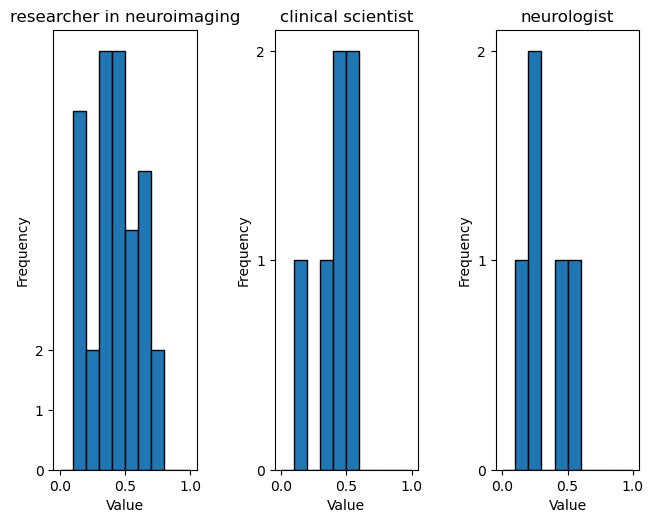

In [5]:


fig, axes = plt.subplots(nrows=1, ncols=3)
plt.tight_layout(pad=0.4, w_pad=2.5, h_pad=1.0)

axes[0].hist(dice_manual1, bins=10, range=(0, 1), edgecolor='black')
axes[0].set_title('researcher in neuroimaging')
axes[0].set(xlabel='Value')
axes[0].set(ylabel='Frequency')
axes[0].set_yticks(np.arange(max(dice_manual1)+2))


axes[1].hist(dice_manual2, bins=10, range=(0, 1), edgecolor='black')
axes[1].set_title('clinical scientist')
axes[1].set(xlabel='Value')
axes[1].set(ylabel='Frequency')
axes[1].set_yticks(np.arange(max(dice_manual2)+2))


axes[2].hist(dice_manual3, bins=10, range=(0, 1), edgecolor='black')
axes[2].set_title('neurologist')
axes[2].set(xlabel='Value')
axes[2].set(ylabel='Frequency')
axes[2].set_yticks(np.arange(max(dice_manual3)+2))
plt.draw_all()
plt.savefig('dice_manual.png',dpi=300,bbox_inches='tight')
plt.show()

